 ### Vamos tentar usar o MLP com mais camadas para resolver um dataset mais complexo?

In [1]:
#Criando dataset em espiral

import numpy as np                          # carrega a biblioteca numpy para operações matriciais

from sklearn.preprocessing import StandardScaler  # importa o método Standard Scaler para a normalização (escalamento) dos dados
from sklearn.utils import shuffle    # metodo shuffle vai embaralhar os pontos gerados

np.random.seed(1000)   # define a seed do random para que o experimento possa ser reproduzido

nb_samples = 1000              #serão criados 1000 pontos
nsb = int(nb_samples / 2)      #divididos em 2 grupos

X = np.zeros(shape=(nb_samples, 2), dtype=np.float32)  #onde aqui definimos o tamanho do conjunto X (pontos) - 1000 pontos com 2 dimensões (coordenadas)
Y = np.zeros(shape=(nb_samples,), dtype=np.float32)   #e do Y (classes conjunto roxo = 1 ou conjunto amarelo = 0)
# dtype define o tipo de dados para float - numero com decimais

t = 15.0 * np.random.uniform(0.0, 1.0, size=(nsb, 1)) #cria a constante de dispersão das espirais

#cria a espiral da classe 0
X[0:nsb, :] = t * np.hstack([-np.cos(t), np.sin(t)]) + np.random.uniform(0.0, 1.8, size=(nsb, 2)) 
Y[0:nsb] = 0 #classe 0

#cria a espiral da classe 1
X[nsb:, :] = t * np.hstack([np.cos(t), -np.sin(t)]) + np.random.uniform(0.0, 1.8, size=(nsb, 2))
Y[nsb:] = 1 #classe 1

ss = StandardScaler()
X = ss.fit_transform(X) #normaliza os dados para a escala entre 0,1

X, Y = shuffle(X, Y, random_state=1000) # embaralha os dados

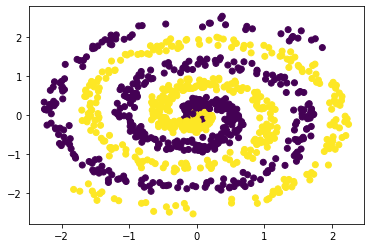

In [2]:
#plotando o dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [53]:
#vamos separar o conjunto de treinamento e de testes
#20% para testes, o restante para treinamento

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, to_categorical(Y), test_size=0.2, random_state=1000, shuffle=False) # separa o conjunto de teste com 20% dos dados 
    #apesar do random_state = 1000 (seed) os dados não são sorteados aleatoriamente - shuffle=False
#outros 80% são definidos no conjunto de teste

### Definindo a rede neural profunda com 4 camadas:

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def build_model_alg_example():
    
    model = Sequential()  # carrega um modelo feed-forward

    model.add(Dense(64, input_dim=2)) #cria uma camada densa com com 64 neuronios e 2 entradas
    model.add(Activation('relu')) #usando função de ativação relu

    model.add(Dense(32))  #cria uma camada densa com com 32 neuronios (que recebe as saídas da camada anterior)
    model.add(Activation('relu')) #usando função de ativação relu

    model.add(Dense(16))  #cria uma camada densa com com 16 neuronios (que recebe as saídas da camada anterior)
    model.add(Activation('relu')) #usando função de ativação relu

    model.add(Dense(2))  #cria uma camada densa com com 2 neuronios (que recebe as saídas da camada anterior)
    model.add(Activation('softmax'))   #usando função de ativação softmax para definir qual é a classe na saída

    return model

In [6]:
#Gerando o modelo
from keras.optimizers import SGD # carrega o algoritmo SGD (Stochastic Gradient Descendent) p/ uso durante o aprendizado

sgd_model = build_model_alg_example() # usa função anterior para definir a arquitetura da rede

sgd = SGD(learning_rate=0.01, momentum=0.99, nesterov=True) #define o algoritom de aprendizado com tx de aprendizado = 0.01, momentum=0.99
                                                            #nesterov= true ativa a opção de usar o momentum
                                                            #momentum ajuda no aprendizado por modificar o tamanho do "passo" na direção da correção dos erros
                                                            #que o algoritmo dá a cada época

sgd_model.compile(optimizer=sgd,  
              loss='categorical_crossentropy',
              metrics=['accuracy']) # define a rede neural

In [7]:
#realizando treinamento da rede neural 
#usando 100 épocas

history = sgd_model.fit(X_train,  #para o conjunto de teste "train" onde x_train sao os atributos
                        Y_train, #e y_train sao as classes
          epochs=100, #em 100 épocas
          batch_size=32,#de 32 em 32
          validation_data=(X_test, Y_test))# e demonstrando a acurácia de teste com o conjunto "X_test e Y_test"

Epoch 1/100
25/25 [==============================] - 2s 24ms/step - loss: 0.6959 - accuracy: 0.4963 - val_loss: 0.6942 - val_accuracy: 0.5150
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.4925 - val_loss: 0.6773 - val_accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.5562 - val_loss: 0.6799 - val_accuracy: 0.6550
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5337 - val_loss: 0.6695 - val_accuracy: 0.6850
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.5587 - val_loss: 0.6701 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.5975 - val_loss: 0.6695 - val_accuracy: 0.6250
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5675 - val_loss: 0.6570 - val_accuracy: 0.6150
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1456 - accuracy: 0.9325 - val_loss: 0.2248 - val_accuracy: 0.8950
Epoch 60/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 0.9325 - val_loss: 0.0848 - val_accuracy: 0.9700
Epoch 61/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.9388 - val_loss: 0.1470 - val_accuracy: 0.9350
Epoch 62/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2021 - accuracy: 0.9312 - val_loss: 0.2501 - val_accuracy: 0.9200
Epoch 63/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2375 - accuracy: 0.9125 - val_loss: 0.2246 - val_accuracy: 0.9200
Epoch 64/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2058 - accuracy: 0.9062 - val_loss: 0.2232 - val_accuracy: 0.8700
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2114 - accuracy: 0.9038 - val_loss: 0.1835 - val_accuracy: 0.9300
Epoch 

### Vamos verificar o resultado?

32/32 [==============================] - 0s 2ms/step


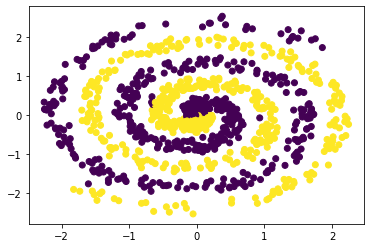

In [8]:
#verificação(predição) usando a base de teste
#qual seria a resposta da rede treinada se ela classificar os pontos que estao no conjunto de testes?

Y_eval_mlp = np.argmax(sgd_model.predict(X), axis=1) #retorna as classes definidas pelo modelo

#plotando o resultado
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y_eval_mlp)# exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
plt.show() #exibe gráfico

In [ ]:
def plot_surface_model(model):    

    Xm = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000) # cria 1000 pontos para a coordenada X
    Ym = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000) # cria 1000 pontos para a coordenada Y
    Xmg, Ymg = np.meshgrid(Xm, Ym) #retorna as coordenadas da grade 2-D com base nas coordenadas contidas nos vetores x e y
    X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T #cria o conjunto de entradas para as coordenadas geradas
    
    X_eval = np.float32(X_eval) #converte valores para float32
    
    Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)# usa o modelo carregado em model para realizar a classificação

    plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)# exibe pontos para coordenadas em X_Test definindo as cores a partir dos dados em Y_eval_mlp
    plt.show() #exibe gráfico

31250/31250 [==============================] - 67s 2ms/step


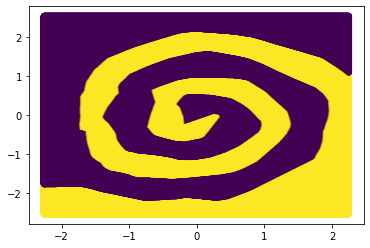

In [10]:
# plotando a superficie de predição
plot_surface_model(sgd_model) #vamos chamar a função implementada logo acima

### Como verificar a qualidade do modelo? (acurácia e função de perda)

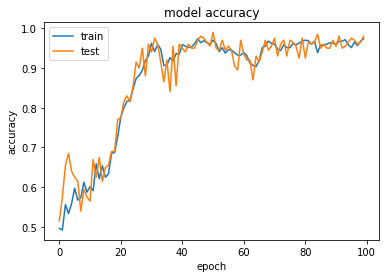

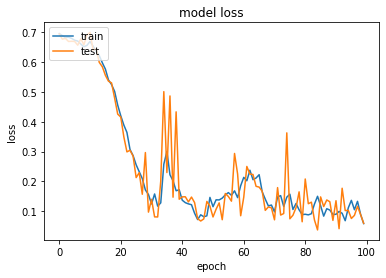

In [11]:
# lista todos os dados contidos no histórico de treinamento
#print(history.history.keys())

# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

## ADV Deep Learning

### Filtro Laplaciando

In [12]:
# vamos ver efeito que acontece quando usamos o filtro laplaciano em uma imagem?

from scipy.misc import face # carregar imagem do guaxinim no scipy - usada como exemplo

img = face(gray=True) # descarta cores da imagem - transforma em tons de cinza ou seja 1 único canal

#obs - o objeto img não é um objeto de imagem e sim uma matriz numérica com os valores dos pixels da imagem

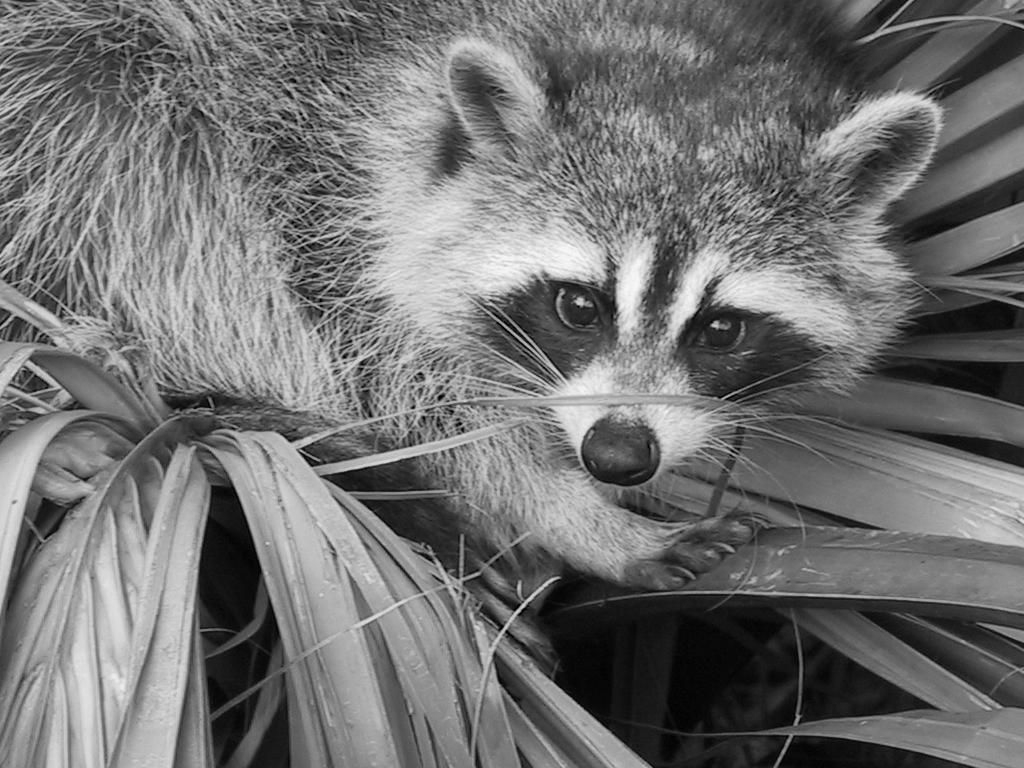

In [13]:
from PIL import Image # PIL é uma biblioteca de tratamento de imagens

Image.fromarray(img) #vamos criar um objeto de imagem a partir da matriz numérica carregada

In [14]:
#para aplicar o filtro, vamos criar uma matriz que define o "kernel laplaciano"

import numpy as np #usando a biblioteca numpy que cuida das operações matriciais

kernel = np.array(
    [[0, 1, 0],
     [1, -4, 0],
     [0, 1, 0]], 
     dtype=np.float32) # cria uma matriz do tipo float 32

cfilter = np.zeros((3, 3, 1, 1), dtype=np.float32)
cfilter[:, :, 0, 0] = kernel # adiciona os valores da matriz e 2 dimensoes em uma matriz de 4 dimensões 3 x 3 x 1 x 1  - onde 1 define que há apenas 1 único canal de cores neste exemplo

In [15]:
import tensorflow.compat.v1 as tf # carrega o tensorflow v1
tf.disable_v2_behavior()

graph = tf.Graph() # define um grafo para representar o fluxo da rede

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=(None, 768, 1024, 1), name='image') #define a entrada da rede a partir da imagem
    f = tf.constant(cfilter) #define o filtro a ser aplicado
    
    y = tf.nn.conv2d(x, f, strides=[1, 1, 1, 1], padding='SAME') #realiza a operação convolucional  com stride 1 e same padding

session = tf.InteractiveSession(graph=graph) #cria sessão para executar a rede 

c_img = session.run([y], feed_dict={x: img.reshape((1, 768, 1024, 1))}) #img.reshape((1, 768, 1024, 1) transforma a imagem p/ 4 dimensões e aplica em x
# a sessão retorna c_img que é a matriz com o resultado

n_img = np.array(c_img).reshape((768, 1024)) # transforma o resultado em uma matriz no formato da imagem

Instructions for updating:
non-resource variables are not supported in the long term


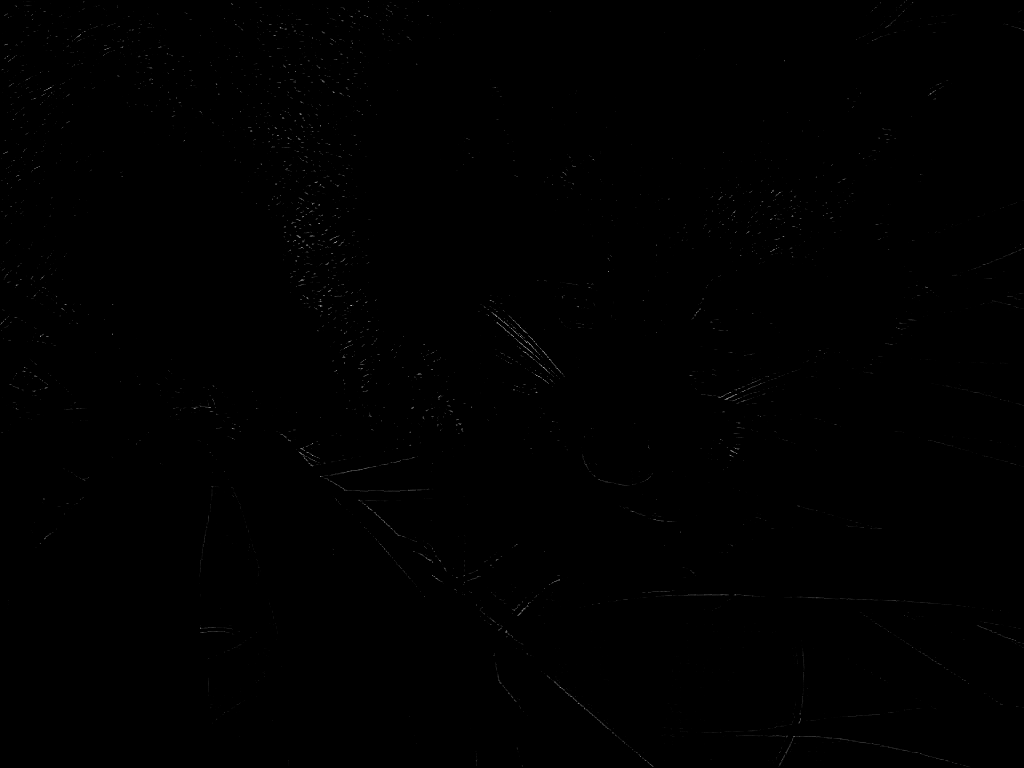

In [16]:
im = Image.fromarray(n_img) #transforma a imagem de uma matriz numérica para objeto imagem
if im.mode != 'RGB': #se a imagem não for RGB, converte em RGB - apenas para compatibilidade com a exibição
    im = im.convert('RGB')
im #exibe imagem após a aplicação do kernel

### Deep Convolutional Network (DCN)

In [17]:
#Neste exemplo, vamos usar uma DCN para aprender a classificar
#os digitos da base MNIST

from keras.datasets import mnist # a base mnist está disponível como exemplo dentro da biblioteca Keras

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #carrega os conjuntos de treinamento (_train) e teste (_test)

width = height = X_train.shape[1] #define que o tamanho da matriz da rede é o mesmo tamaho da tupla de cada linha da base de dados

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0 #transforma o valor do pixel de 0-255 para 0-1 e redefine a tupla para o formato da matriz
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0 #transforma o valor do pixel de 0-255 para 0-1 e redefine a tupla para o formato da matriz

In [18]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10) #transforma as classes do conjunto de treinamento em 10 classes categoricas
Y_test = to_categorical(Y_test, num_classes=10) #transforma as classes do conjunto de testes em 10 classes categoricas

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten

model = Sequential() # carrega um modelo feed-forward

model.add(Dropout(0.25, input_shape=(width, height, 1), seed=1000))  #cria uma camana de entrada do tamanho (width, height, 1) com seed = 1000 para a escolha aleatória do dropout
#faz o dropout em 25% dos neurônios de entrada

model.add(Conv2D(16, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 16 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(Conv2D(16, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 16 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding
model.add(Conv2D(32, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 32 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding

model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 64 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding

model.add(Flatten()) #transforma a saída anterior em um único vetor de entrada para a rede MLP 

model.add(Dense(512)) # cria uma rede MLP com 512 neuronios na entrada
model.add(Activation('relu')) # e função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(Dense(10)) # ao final, define a camada de saída com 10 neurônios - 1 para cada classe
model.add(Activation('softmax')) # usando função de ativação softmax para definir qual é a classe na saída

In [20]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy']) # define a rede neural com taxa de aprendizado 0.001, 

In [21]:
#treinamento da rede neural 
#usando apenas 2 épocas para calcular rapidamente - apenas demonstração, poucas épocas não garantem um bom aprendizado - underfitting

#método fit executa o treinamento
history = model.fit(X_train,  #para o conjunto de teste "train" onde x_train sao os atributos 
                    Y_train,  #e y_train sao as classes
                    epochs=2, #em 2 épocas
                    batch_size=256, #de 256 em 256
                    validation_data=(X_test, Y_test)) # e demonstrando a acurácia de teste com o conjunto "X_test e Y_test"


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - ETA: 0s - loss: 0.5548 - acc: 0.8191

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 102s 2ms/sample - loss: 0.5548 - acc: 0.8191 - val_loss: 0.1420 - val_acc: 0.9596
Epoch 2/2
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1852 - acc: 0.9423 - val_loss: 0.0746 - val_acc: 0.9763


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


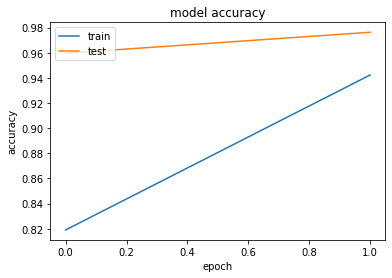

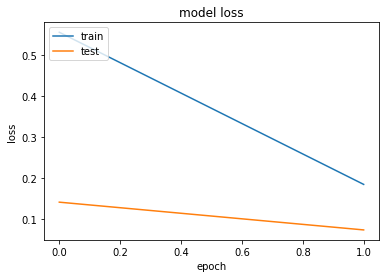

In [24]:
# lista todos os dados contidos no histórico de treinamento
#print(history.history.keys())

# plotamos a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()


#obs: vejam nos dados abaixo que poucas épocas geram underfitting - falta de aprendizado

In [26]:
# mesmo assim, grande parte dos digitos foram classificados corretamente
# Vamos verificar a matriz de confusão?

from sklearn import metrics
y_pred = model.predict(X_test) #calcula a predição do conjunto de validação

matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1)) #gera a matriz de confusão para os dados
matrix

#a matriz de confusão compara o dado esperado com o dado previsto. A diagonal define quantos exemplos foram preditos corretamente
#de acordo com o valor esperado
# as linhas e colunas seguem a ordem das classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

#a matriz de confusão ajuda a identificarmos onde erra-se mais e quais são os valores que são confundidos com outros pelo modelo

array([[ 973,    0,    0,    0,    0,    1,    4,    1,    0,    1],
       [   0, 1129,    3,    0,    0,    0,    1,    0,    2,    0],
       [   7,    0, 1002,    5,    2,    0,    0,   10,    6,    0],
       [   0,    0,    2,  980,    0,   10,    0,    8,    7,    3],
       [   1,    0,    2,    0,  962,    0,    5,    1,    2,    9],
       [   2,    0,    1,    4,    1,  873,    3,    2,    3,    3],
       [   8,    3,    0,    0,    2,    1,  939,    0,    5,    0],
       [   2,    3,    6,    2,    2,    0,    0,  999,    1,   13],
       [  10,    0,    2,    4,    3,    3,    2,    4,  944,    2],
       [   4,    7,    0,    8,   14,    3,    0,    8,    3,  962]],
      dtype=int64)

### Exemplo 2

In [27]:
#Vamos testar um segundoexemplo

import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist # a base mnist está disponível como exemplo dentro da biblioteca Keras

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #carrega os conjuntos de treinamento (_train) e teste (_test)

width = height = X_train.shape[1] #define que o tamanho da matriz da rede é o mesmo tamaho da tupla de cada linha da base de dados

X_train = X_train.reshape((X_train.shape[0], width, height, 1)).astype(np.float32) / 255.0 #transforma o valor do pixel de 0-255 para 0-1 e redefine a tupla para o formato da matriz
X_test = X_test.reshape((X_test.shape[0], width, height, 1)).astype(np.float32) / 255.0 #transforma o valor do pixel de 0-255 para 0-1 e redefine a tupla para o formato da matriz

Y_train = to_categorical(Y_train, num_classes=10) #transforma as classes do conjunto de treinamento em 10 classes categoricas
Y_test = to_categorical(Y_test, num_classes=10) #transforma as classes do conjunto de testes em 10 classes categoricas

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, Flatten
from keras.optimizers import Adam

model = Sequential() # carrega um modelo feed-forward

model.add(Dropout(0.25, input_shape=(width, height, 1), seed=1000))  #cria uma camana de entrada do tamanho (width, height, 1) com seed = 1000 para a escolha aleatória do dropout
#faz o dropout em 25% dos neurônios de entrada

model.add(Conv2D(16, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 16 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(Conv2D(32, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 32 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding

model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 64 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding

model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) #define uma camada convolucional que aprende 64 filtros com um kernel 3x3 e aplica same padding
model.add(Activation('relu')) #usando uma função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(AveragePooling2D(pool_size=(2, 2), padding='same')) #aplica um average ppooling 2 x 2 + same padding

model.add(Flatten()) #transforma a saída anterior em um único vetor de entrada para a rede MLP 

model.add(Dense(1024)) # cria uma rede MLP com 1024 neuronios na entrada
model.add(Activation('relu')) # e função de ativação relu
model.add(Dropout(0.5, seed=1000)) # com dropout de 50% para evitar overfitting

model.add(Dense(10)) # ao final, define a camada de saída com 10 neurônios - 1 para cada classe
model.add(Activation('softmax')) # usando função de ativação softmax para definir qual é a classe na saída

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy']) # define a rede neural com taxa de aprendizado 0.001,               

In [31]:
#treinamento da rede neural 
#usando apenas 2 épocas para calcular rapidamente - apenas demonstração, poucas épocas não garantem um bom aprendizado - underfitting

#método fit executa o treinamento
history = model.fit(X_train,  #para o conjunto de teste "train" onde x_train sao os atributos 
                    Y_train,  #e y_train sao as classes
                    epochs=2, #em 2 épocas
                    batch_size=256, #de 256 em 256
                    validation_data=(X_test, Y_test)) # e demonstrando a acurácia de teste com o conjunto "X_test e Y_test"


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - ETA: 0s - loss: 0.4448 - acc: 0.8539

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 143s 2ms/sample - loss: 0.4448 - acc: 0.8539 - val_loss: 0.1026 - val_acc: 0.9683
Epoch 2/2
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.1497 - acc: 0.9524 - val_loss: 0.0641 - val_acc: 0.9818


In [33]:
# Vamos verificar a matriz de confusão?

from sklearn import metrics
y_pred = model.predict(X_test) #calcula a predição do conjunto de validação

matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1)) #gera a matriz de confusão para os dados
matrix

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[ 975,    0,    0,    0,    0,    1,    3,    1,    0,    0],
       [   1, 1131,    1,    0,    0,    0,    1,    0,    1,    0],
       [   0,    0, 1030,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    1, 1003,    0,    2,    0,    0,    4,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    0,    6],
       [   2,    0,    0,    3,    0,  884,    1,    0,    0,    2],
       [   1,    2,    0,    0,    2,    1,  951,    0,    1,    0],
       [   0,    3,    3,    1,    0,    0,    0, 1019,    1,    1],
       [   4,    0,    1,    1,    0,    1,    1,    1,  959,    6],
       [   0,    3,    0,    0,    4,    1,    0,    3,    2,  996]],
      dtype=int64)